##  Business Analytics on Superstore Data
In this task we are to perform data analysis on the given superstore data.Data Analysis is the so important to understand the data, to get insights from the data.
We are gonna do here the same to find the profit distribution like where the profit is more and where is less, which product is in more demand and which is less in the particular region so that the storekeeper can work on that area to improve his/her sales and profit.

In [1]:
## importing libraries
import pandas as pd  ## data manipulation
import numpy as np    ## linear algebra
import matplotlib.pyplot as plt  ## plotting
import seaborn as sns    ## visualization
%matplotlib inline


In [2]:
## loading the data into notebook
df = pd.read_csv('SampleSuperstore.csv')
print('Importing the data')
df.head(10), df.shape

Importing the data


(        Ship Mode    Segment        Country             City       State  \
 0    Second Class   Consumer  United States        Henderson    Kentucky   
 1    Second Class   Consumer  United States        Henderson    Kentucky   
 2    Second Class  Corporate  United States      Los Angeles  California   
 3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
 4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
 5  Standard Class   Consumer  United States      Los Angeles  California   
 6  Standard Class   Consumer  United States      Los Angeles  California   
 7  Standard Class   Consumer  United States      Los Angeles  California   
 8  Standard Class   Consumer  United States      Los Angeles  California   
 9  Standard Class   Consumer  United States      Los Angeles  California   
 
    Postal Code Region         Category Sub-Category     Sales  Quantity  \
 0        42420  South        Furniture    Bookcases  261.9600         2   

In [3]:
## leta take a glance at last 5 rows of the data
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [4]:
## getting information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
## counting nan values
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
## counting total null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [11]:
## counting total duplicate values
df.duplicated().sum()

17

In [12]:
## locating duplicate values in data
df.loc[df.duplicated()]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
5905,Same Day,Home Office,United States,San Francisco,California,94122,West,Office Supplies,Labels,41.400,4,0.0,19.8720
6146,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.0,3.1752
6334,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
6357,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
7608,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416


In [15]:
## getting description of data
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [21]:
## counting total unique values in segment
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [24]:
## counting total unique modes of shipping
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [25]:
## counting total unique countries in data
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [26]:
## counting total unique values of cities where the store deals in the US
df['City'].value_counts()

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Montebello         1
Waukesha           1
Ormond Beach       1
Palatine           1
Redding            1
Name: City, Length: 531, dtype: int64

In [27]:
## counting total counting of each state in which the store has customers or sells his products
df['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 42
Nevada        

In [28]:
len(df['State'].value_counts())

49

In [29]:
## counting total unique values for each region where store sells 
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [30]:
## getting total counting of each category 
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [32]:
## getting total counting of each product 
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [33]:
## total unique products the sstore sells is :
len(df['Sub-Category'].value_counts())

17

In [36]:
## printing the columns 
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [37]:
## getting total unique sales
df['Sales'].value_counts()

12.960     56
19.440     39
15.552     39
25.920     36
10.368     36
           ..
376.866     1
572.800     1
3.928       1
12.032      1
629.640     1
Name: Sales, Length: 5825, dtype: int64

<AxesSubplot:ylabel='Density'>

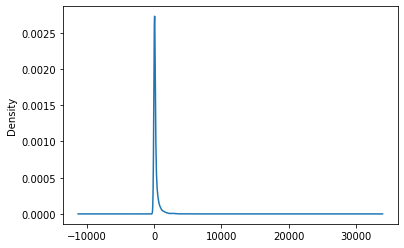

In [42]:
## plotting the density of sales 
df['Sales'].plot(kind = 'kde')

<AxesSubplot:>

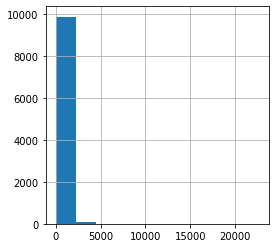

In [48]:
## plotting histograph of sales
df['Sales'].hist(figsize=(4,4))

<AxesSubplot:xlabel='Sales'>

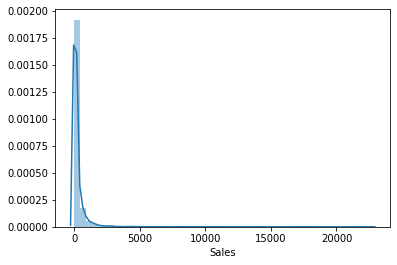

In [49]:
## distribution plot for sales
sns.distplot(df['Sales'])

<AxesSubplot:xlabel='Sales'>

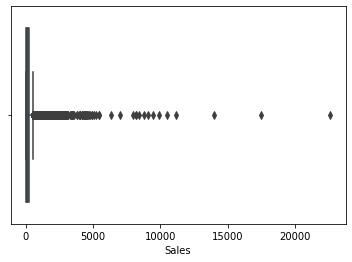

In [52]:
## checking for outliers in sales 
sns.boxplot(df['Sales'], hue = df['Profit'])

We can see from above plots that the sales feature is not normally distributed and it has outliers i.e. sale is somewhere less and somewhere good. 

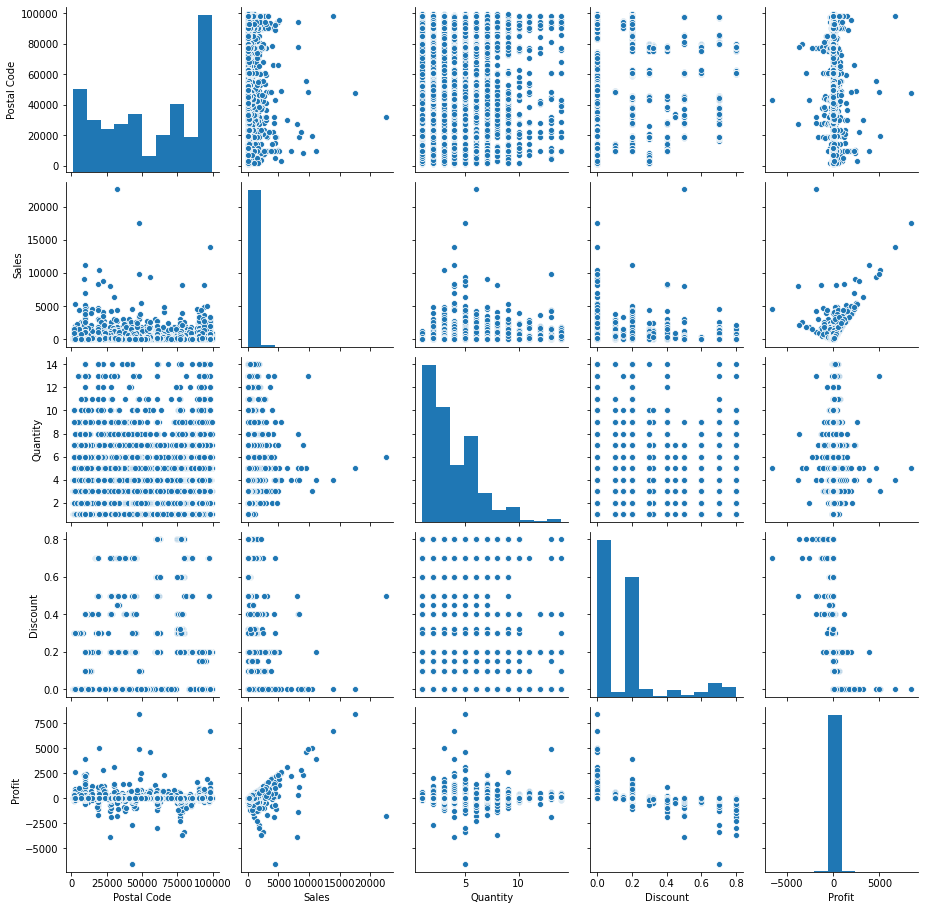

In [53]:
## visualizing pairwise relation among numerical features 
sns.pairplot(df)

array([[<AxesSubplot:title={'center':'Postal Code'}>,
        <AxesSubplot:title={'center':'Sales'}>],
       [<AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Discount'}>],
       [<AxesSubplot:title={'center':'Profit'}>, <AxesSubplot:>]],
      dtype=object)

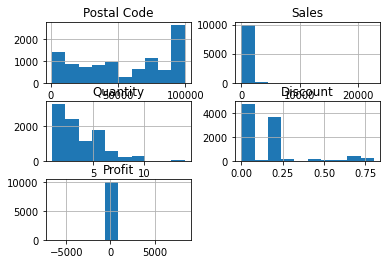

In [54]:
## plotting histograms of whole data
df.hist()

In [57]:
## getting categorical features
cat_feat = [ft for ft in df.columns if df[ft].dtype == 'object']

In [58]:
## getting numerical features
num_feat = [ft for ft in df.columns if df[ft].dtype != 'object']

<AxesSubplot:>

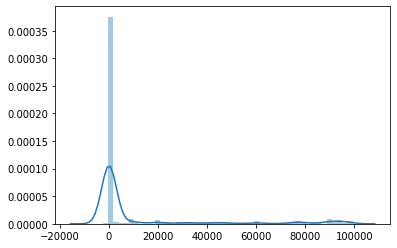

In [59]:
## checking distribution of all numerical features altogether
sns.distplot(df[num_feat])

The overall data distribution is normal(Guassian).

In [65]:
cat_feat

['Ship Mode',
 'Segment',
 'Country',
 'City',
 'State',
 'Region',
 'Category',
 'Sub-Category']

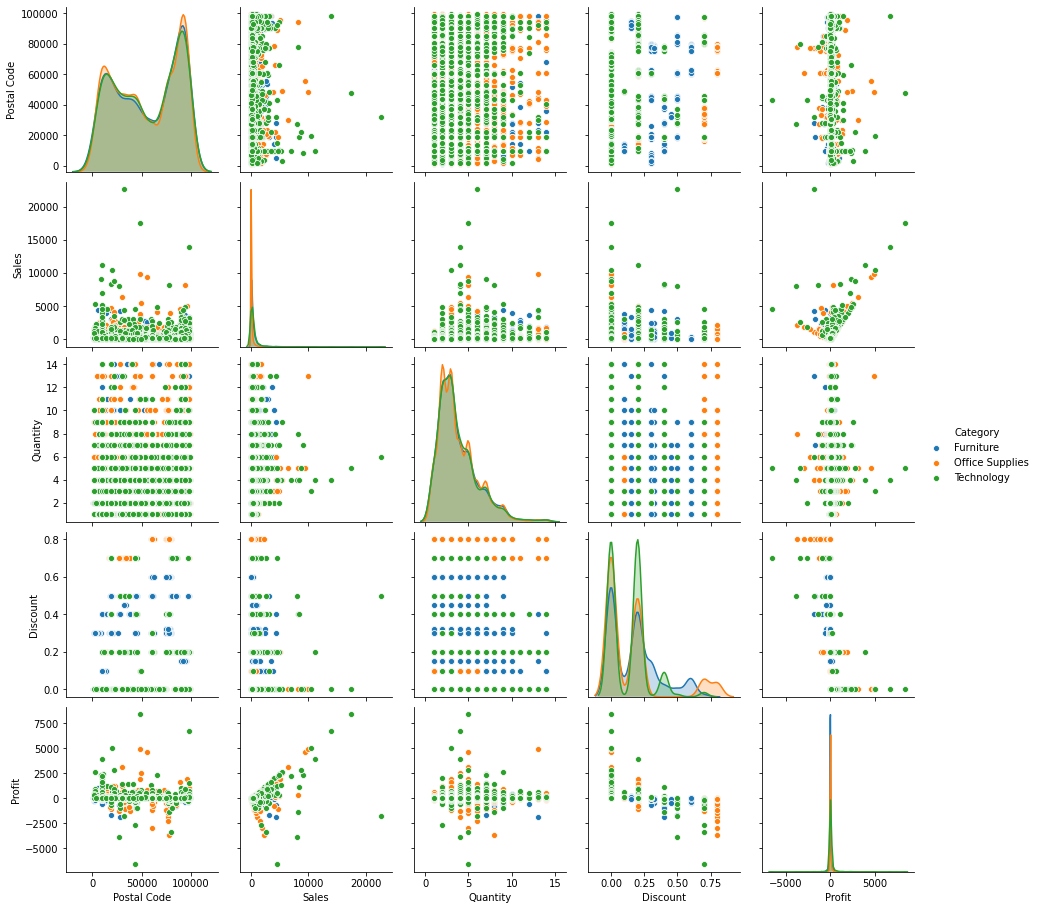

In [61]:
## checking pairwise relations among features with respect to each category 
sns.pairplot(df, hue = 'Category')

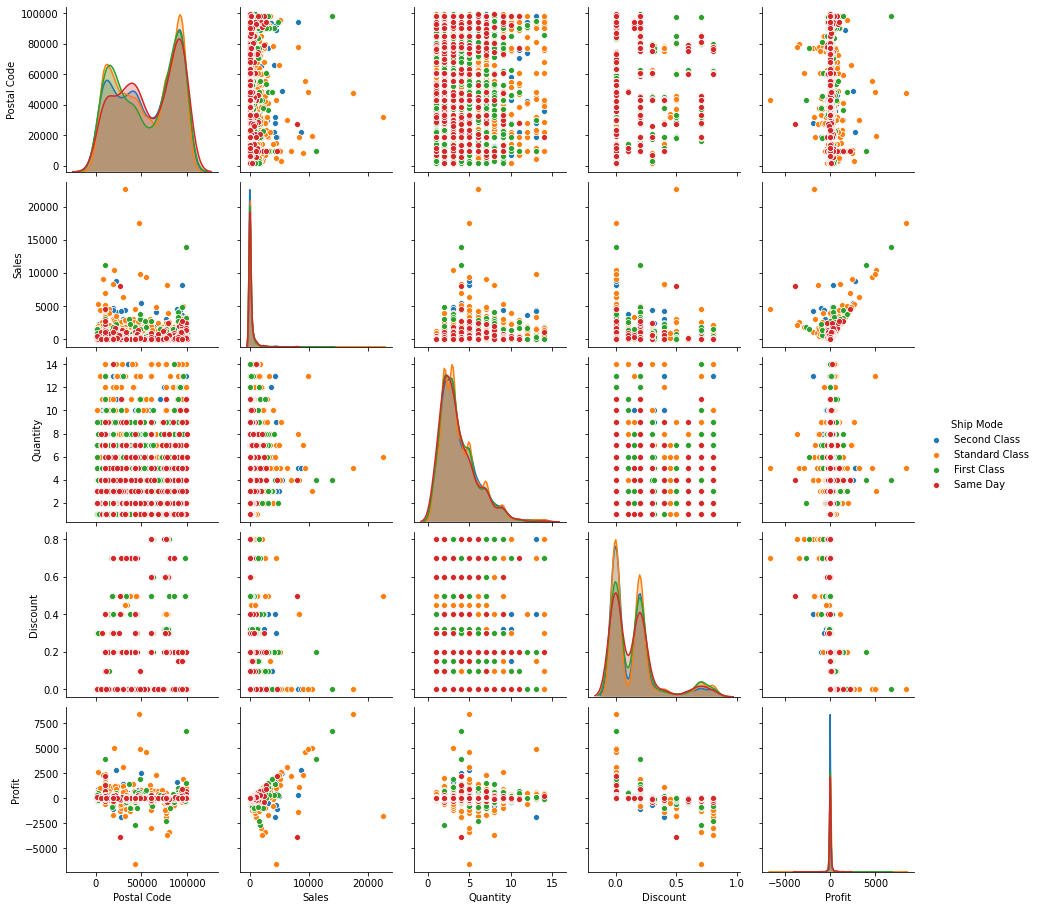

In [66]:
## checking pairwise relations among features with respect to shipping modes
sns.pairplot(df, hue = 'Ship Mode')

As seen in above plot for discount we give less discount on same day or 2 days delivery hence gain more prfits for that.While for standard mode large discounts are given that is why we are shipping larger quantity with standard mode or vice versa. 

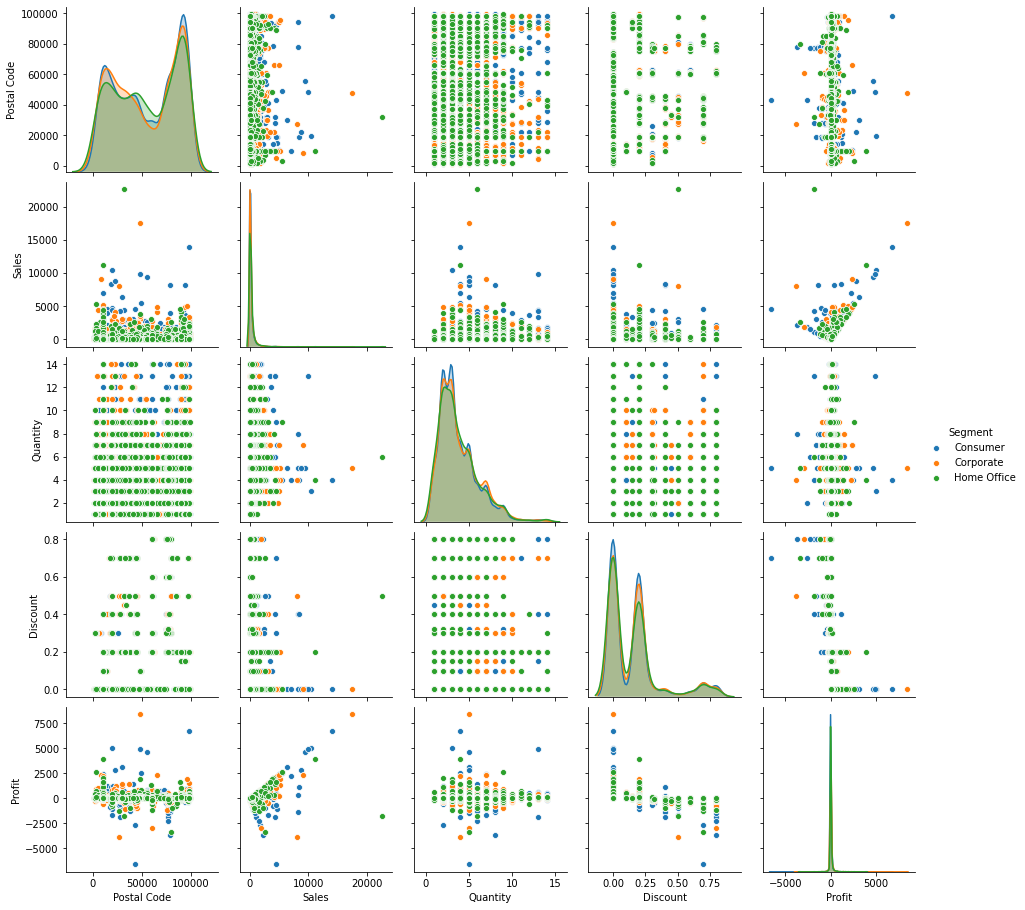

In [67]:
## checking pairwise relations among features with respect to customer segments
sns.pairplot(df, hue = 'Segment')

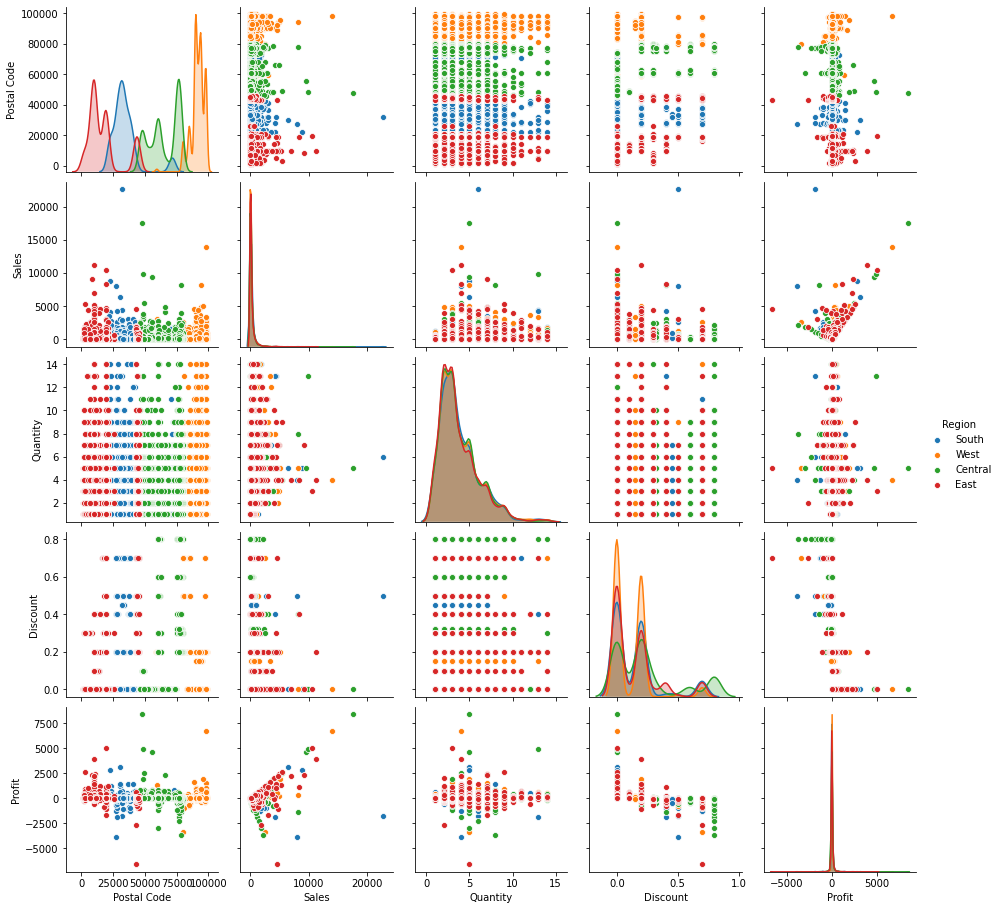

In [69]:
## checking pairwise relations among features with respect in each region
sns.pairplot(df, hue = 'Region')

<AxesSubplot:xlabel='Sales', ylabel='Category'>

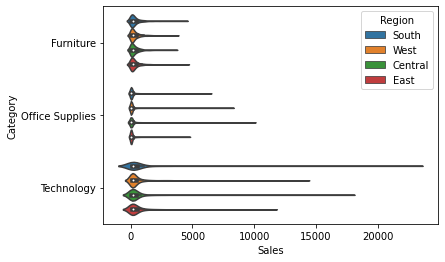

In [76]:
#sns.swarmplot(x='Sales', y='Category',hue = 'Region', data = df )
sns.violinplot(x= 'Sales', y='Category',hue = 'Region', data = df ) ##regional category wise sales

We see here the maximum sales occur in south region for technology products.And overall sale of technology products is also the greater than other two. 

<AxesSubplot:xlabel='Profit', ylabel='Category'>

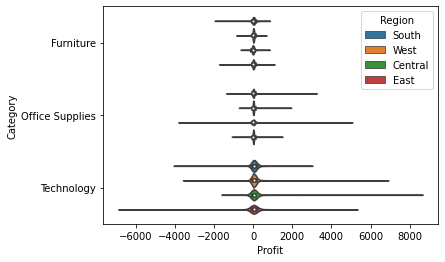

In [3]:
sns.violinplot(x= 'Profit', y='Category',hue = 'Region', data = df )

THe sale is not always profitable.Even each region  for each category gives some loass as well.It seems like in central region office supplies is kind of no profit - no loss business.In the east region the sell is giving net loss for technology products.So the storekeeper needs to increase its profit in east region as the sale of technology product is maximum so no point of losing the sale one just need to focus on profit promising products. 

<AxesSubplot:xlabel='Quantity', ylabel='Category'>

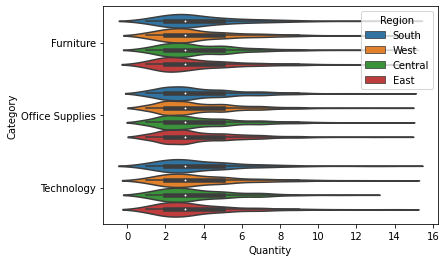

In [4]:
sns.violinplot(x= 'Quantity', y='Category',hue = 'Region', data = df )

The quantity seems like violin's strings, almost equal for each category and region.

<AxesSubplot:xlabel='Discount', ylabel='Category'>

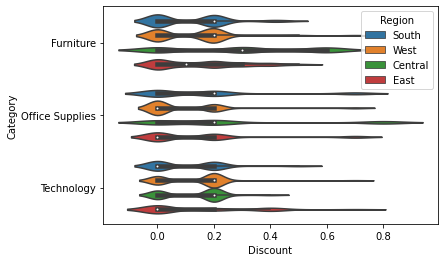

In [5]:
sns.violinplot(x= 'Discount', y='Category',hue = 'Region', data = df )

The loss in the east region on technology products seems fair now as a lot discounts are being given on them that can be of due to the competitions or may be storekeeper is just looking for making connections as of now.So to get more profit either one need to increase no. of customers or cut the discount rate slightly and slowly so that the customers also wont be affected much.

<AxesSubplot:xlabel='Category', ylabel='Sales'>

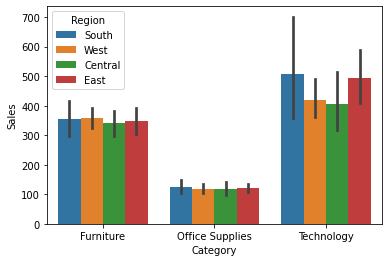

In [90]:
sns.barplot(x=df['Category'], y = df['Sales'],hue = df['Region'])

It is clear from here that office supplies sales are very less even after the fact that it is gaining more profit than other two so increasing in sale for office supplies might be the profitable strategy.

<AxesSubplot:>

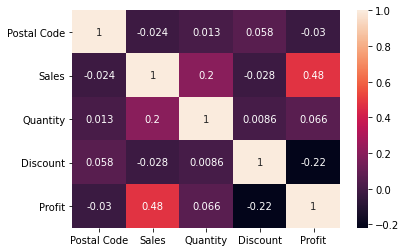

In [93]:
## checking pearson corelation among features and visualizing the same on heatmap
sns.heatmap(df.corr(), annot = True)

As we see here sales and profit showing good positive corelation i.e. directly increment in sale in some areas for some products will lead to more profitable transactions.And discount is showing negative corelation with profit and with sales as well. 

<AxesSubplot:xlabel='Category', ylabel='Quantity'>

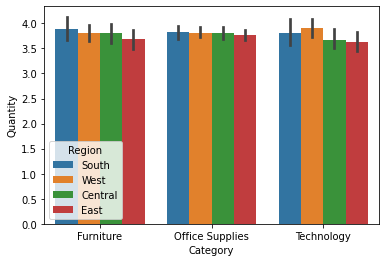

In [94]:
## region wise selling quantity for each category
sns.barplot(x=df['Category'], y = df['Quantity'],hue = df['Region'])

<AxesSubplot:xlabel='Category', ylabel='Profit'>

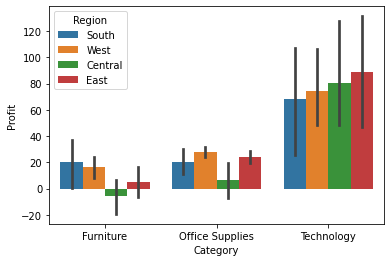

In [95]:
## category wise profit on bar plot in each region
sns.barplot(x=df['Category'], y = df['Profit'],hue = df['Region'])

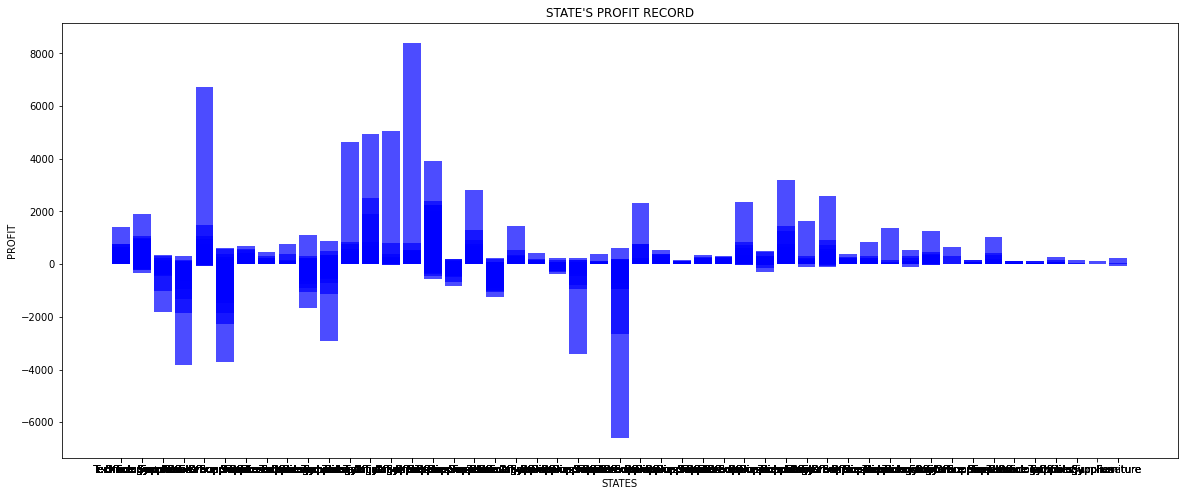

In [74]:
## statewise profit variation for each category
#sns.barplot(x=df['State'], y = df['Profit'],hue = df['Category'])
plt.figure(figsize=(20,8))
x=df['State']
y=df['Profit']
plt.bar(x,y, width=0.85, alpha=0.7, color='blue',  ecolor='black',tick_label=df['Category'])
plt.title("STATE'S PROFIT RECORD")
plt.ylabel('PROFIT')
plt.xlabel('STATES')
plt.show()

We see here some states are giving us good profit while some states loss.

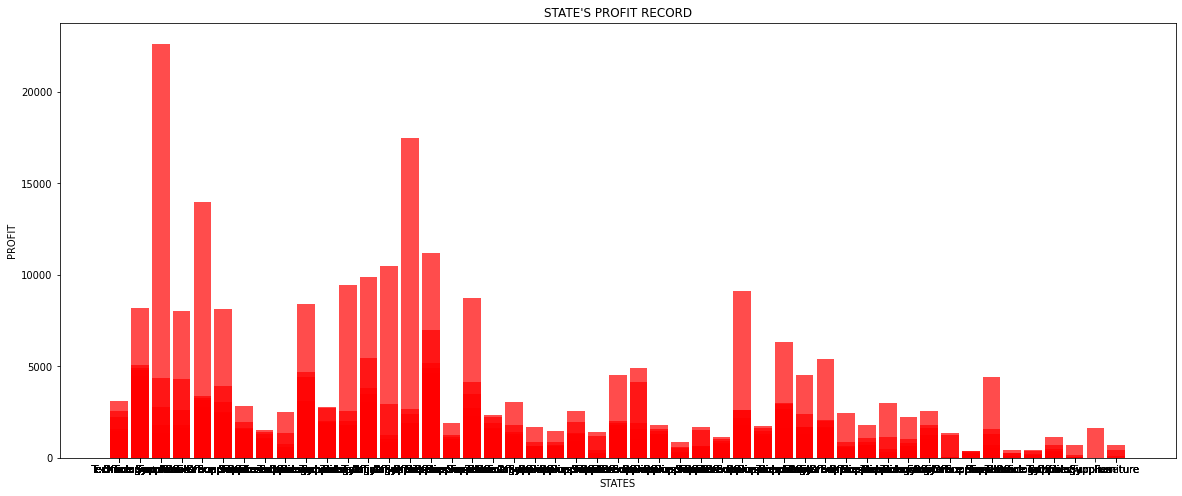

In [75]:
## state wise sales of each category
#sns.barplot(x=df['State'], y = df['Sales'],hue = df['Category'])
plt.figure(figsize=(20,8))
x=df['State']
y=df['Sales']
plt.bar(x,y, width=0.85, alpha=0.7, color='red',  ecolor='black',tick_label=df['Category'])
plt.title("STATE'S PROFIT RECORD")
plt.ylabel('PROFIT')
plt.xlabel('STATES')
plt.show()

Sales is also showing variation for different states.

<AxesSubplot:xlabel='Sales'>

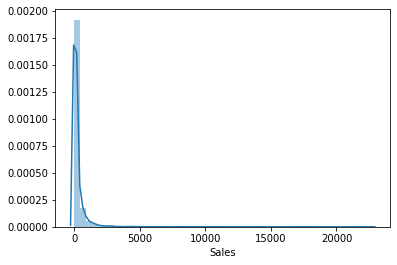

In [97]:
## distribution plot for sales
sns.distplot(df['Sales'])

<AxesSubplot:xlabel='Quantity'>

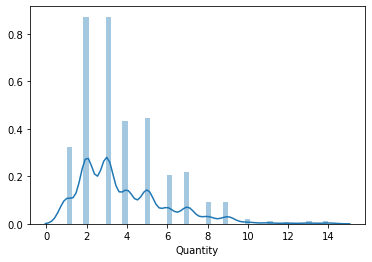

In [98]:
## distribution of quantity
sns.distplot(df['Quantity'])

<AxesSubplot:xlabel='Profit'>

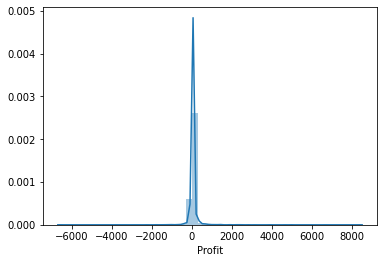

In [99]:
## distribution of profit
sns.distplot(df['Profit'])

<AxesSubplot:xlabel='Quantity', ylabel='Sales'>

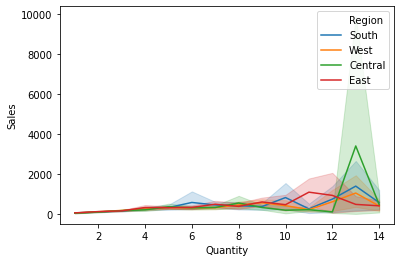

In [102]:
## sales with respect to quantity in different region
sns.lineplot(x= df['Quantity'],y=df['Sales'], hue=df['Region'])

<AxesSubplot:xlabel='Quantity', ylabel='Sales'>

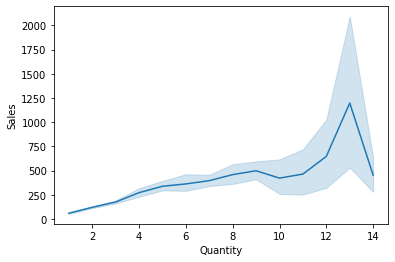

In [103]:
sns.lineplot(x= df['Quantity'],y=df['Sales'])

we are selling 0 to 15 products altogether the more the quantity the more the sales amount.As it should be. 

<AxesSubplot:xlabel='Quantity', ylabel='Profit'>

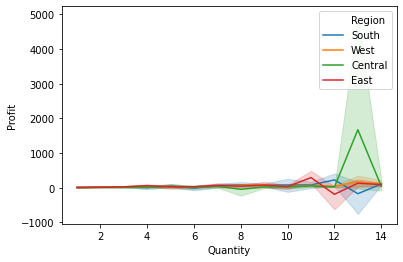

In [109]:
sns.lineplot(x=df['Quantity'],y=df['Profit'],hue=df['Region'])

Large quantity shipping gives us large profit in central region but in other regions it is giving us nothing but the loss.

<AxesSubplot:xlabel='Quantity', ylabel='Profit'>

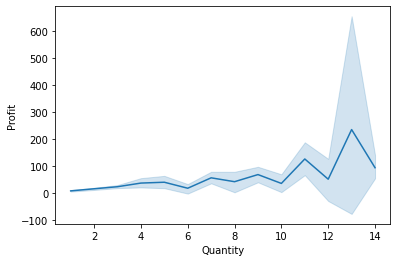

In [111]:
sns.lineplot(x= df['Quantity'],y=df['Profit'])

<AxesSubplot:xlabel='Quantity', ylabel='Sales'>

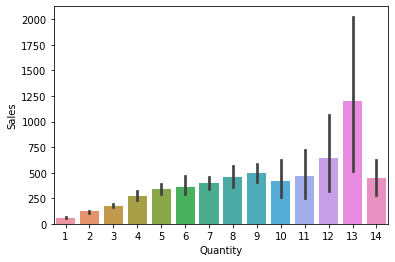

In [114]:
sns.barplot(x=df['Quantity'],y=df['Sales'])

The plot illustrates that sales is increasing along with the quantity.

<AxesSubplot:xlabel='Quantity', ylabel='Profit'>

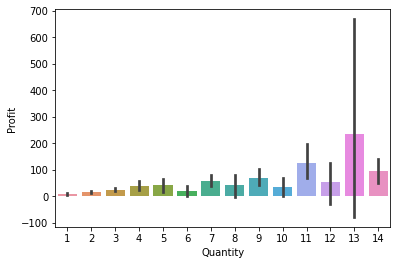

In [110]:
sns.barplot(x= df['Quantity'],y=df['Profit'])

Less quantity generates less profit where as large quantity is generating profit and loss as well.

## Feature Engineering Analysis

In [28]:
##getting sum of profits for each region
Reg_Profit=df.groupby('Region').Profit.sum().sort_values(ascending = False).reset_index() 
##getting sum of sales for each region
Reg_Sales=df.groupby('Region').Sales.sum().sort_values(ascending = False).reset_index()

In [29]:
## creating a dataframe for new features
Reg_1 = pd.merge(Reg_Sales, Reg_Profit, how='right',on='Region')
Reg_1.rename(columns = {'Sales':'Total_Sales','Profit':'Total_Profit'}, inplace = True)
Reg_1

,Region,Total_Sales,Total_Profit
0,West,725457.8245,108418.4489
1,East,678781.2400,91522.7800
2,South,391721.9050,46749.4303
3,Central,501239.8908,39706.3625


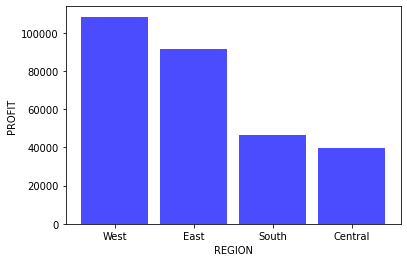

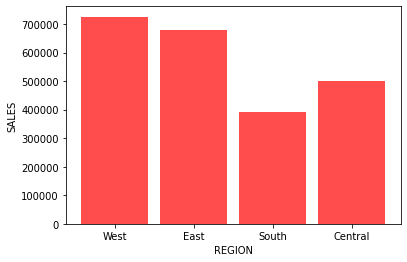

In [31]:
plt.bar(Reg_1['Region'],Reg_1['Total_Profit'], width=0.85, alpha=0.7, color='blue', ecolor='black') ##plotting profit
plt.ylabel('PROFIT')
plt.xlabel('REGION')
plt.show()

plt.bar(Reg_1['Region'],Reg_1['Total_Sales'], width=0.85, alpha=0.7, color='red', ecolor='black')  ##plotting sales
plt.ylabel('SALES')
plt.xlabel('REGION')
plt.show()

Total sale and total profit in west region is maximum while in south region sale is minimum and incentral region net profit is minimum.  

Text(0, 0.5, 'TOTAL SALES--PROFIT')

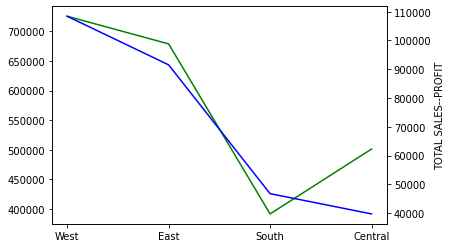

In [32]:
fig, ax1 = plt.subplots()
x = Reg_1['Region']
y1 = Reg_1['Total_Sales']
y2 = Reg_1['Total_Profit']
ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')
plt.xlabel('REGION')
plt.ylabel('TOTAL SALES--PROFIT')

The green line shows total sales and blue line is for total profit which are showing the conclusion of above barplot.

In [34]:
Profit_Detail=df.groupby(['Region','State']).Profit.sum().sort_values(ascending = False).reset_index()
Profit_Detail.rename(columns = {'Profit':'StateTotal_Profit'}, inplace = True)
Profit_Detail1=df.groupby(['Region','State']).Sales.sum().sort_values(ascending = False).reset_index()
Profit_Detail2=Profit_Detail1.drop(['Region'], axis = 1)
Profit_Detail2.rename(columns = {'Sales':'StateTotal_Sales'}, inplace = True)
merge = pd.merge(Profit_Detail, Profit_Detail2, how='right',on='State')
merge.head()

,Region,State,StateTotal_Profit,StateTotal_Sales
0,West,California,76381.3871,457687.6315
1,East,New York,74038.5486,310876.2710
2,Central,Texas,-25729.3563,170188.0458
3,West,Washington,33402.6517,138641.2700
4,East,Pennsylvania,-15559.9603,116511.9140


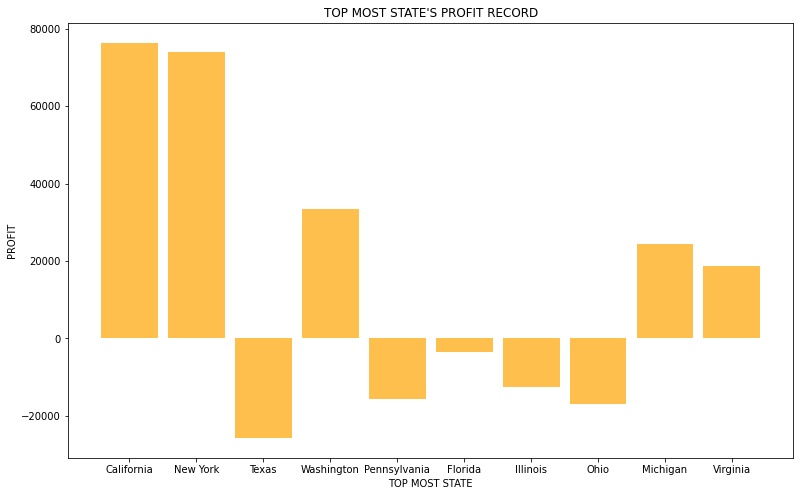

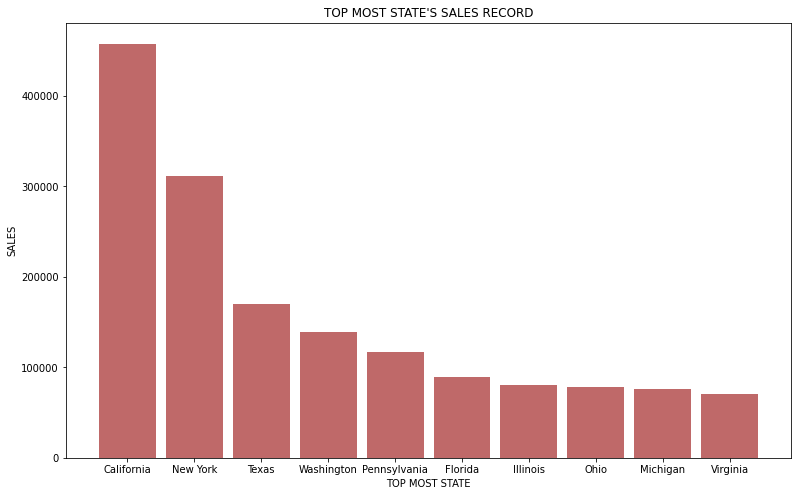

In [59]:
plt.figure(figsize=(13,8))
x=merge['State'].head(10)
y=merge['StateTotal_Profit'].head(10)
plt.bar(x,y, width=0.85, alpha=0.7, color='orange',  ecolor='black')
plt.title("TOP MOST STATE'S PROFIT RECORD")
plt.ylabel('PROFIT')
plt.xlabel('TOP MOST STATE')
plt.show()

plt.figure(figsize=(13,8))
x=merge['State'].head(10)
y=merge['StateTotal_Sales'].head(10)
plt.bar(x,y, width=0.85, alpha=0.7, color='brown',  ecolor='black')
plt.title("TOP MOST STATE'S SALES RECORD")
plt.ylabel('SALES')
plt.xlabel('TOP MOST STATE')
plt.show()

Text(0, 0.5, 'TOTAL SALES--PROFIT')

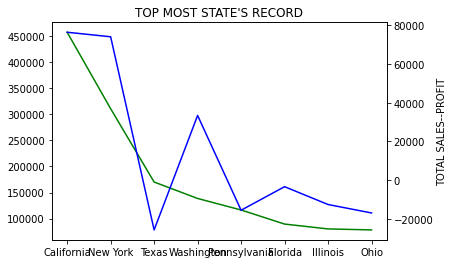

In [37]:
fig, ax1 = plt.subplots()
x = merge['State'].head(8)
y1 = merge['StateTotal_Sales'].head(8)
y2 = merge['StateTotal_Profit'].head(8)
ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')
plt.title("TOP MOST STATE'S RECORD")
plt.xlabel('TOP MOST STATE')
plt.ylabel('TOTAL SALES--PROFIT')

In [39]:
GP=df.groupby(['Ship Mode','Segment']).Sales.sum().sort_values(ascending = False).reset_index()
GP1=df.groupby(['Ship Mode','Segment']).Profit.sum().sort_values(ascending = False).reset_index()
GP1=GP1.drop(['Segment'], axis = 1)
merge_3 = pd.merge(GP, GP1, how='right',on='Ship Mode')
merge_3.rename(columns = {'Sales':'Total_Sales','Profit':'Total_Profit'}, inplace = True)
merge_3.head(10)

,Ship Mode,Segment,Total_Sales,Total_Profit
0,Standard Class,Consumer,710137.0714,77924.0490
1,Standard Class,Corporate,409040.5351,77924.0490
2,Standard Class,Home Office,239038.1365,77924.0490
3,Standard Class,Consumer,710137.0714,57470.8067
4,Standard Class,Corporate,409040.5351,57470.8067
5,Standard Class,Home Office,239038.1365,57470.8067
6,Standard Class,Consumer,710137.0714,28693.9318
7,Standard Class,Corporate,409040.5351,28693.9318
8,Standard Class,Home Office,239038.1365,28693.9318
9,Second Class,Consumer,231498.9496,24946.9112


Text(0, 0.5, 'TOTAL VALUE OF SHIPING_MODE')

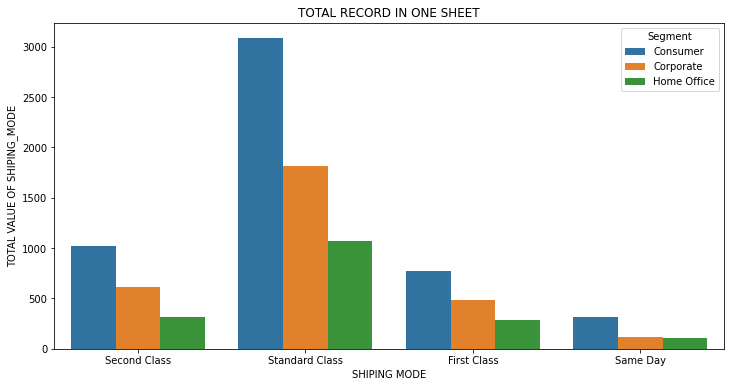

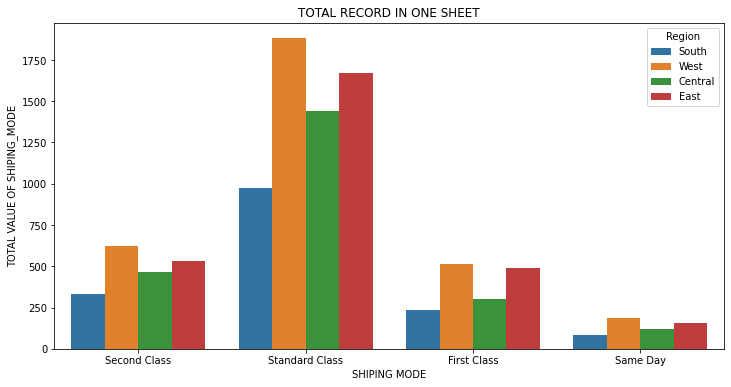

In [40]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='Ship Mode',hue='Segment')
plt.title("TOTAL RECORD IN ONE SHEET")
plt.xlabel('SHIPING MODE')
plt.ylabel('TOTAL VALUE OF SHIPING_MODE')

plt.figure(figsize=(12,6))
sns.countplot(data=df,x='Ship Mode',hue='Region')
plt.title("TOTAL RECORD IN ONE SHEET")
plt.xlabel('SHIPING MODE')
plt.ylabel('TOTAL VALUE OF SHIPING_MODE')


In [41]:
GP_4=df.groupby(['Sub-Category']).Profit.sum().sort_values(ascending = False).reset_index()
GP_5=df.groupby(['Sub-Category']).Sales.sum().sort_values(ascending = False).reset_index()
GP_5.rename(columns = {'Sales':'SC_TotalSales'}, inplace = True)
GP_4.rename(columns = {'Profit':'SC_TotalProfit'}, inplace = True)
merge2 = pd.merge(GP_4, GP_5, how='right',on='Sub-Category')
merge2.head()


,Sub-Category,SC_TotalProfit,SC_TotalSales
0,Phones,44515.7306,330007.054
1,Chairs,26590.1663,328449.103
2,Storage,21278.8264,223843.608
3,Tables,-17725.4811,206965.532
4,Binders,30221.7633,203412.733


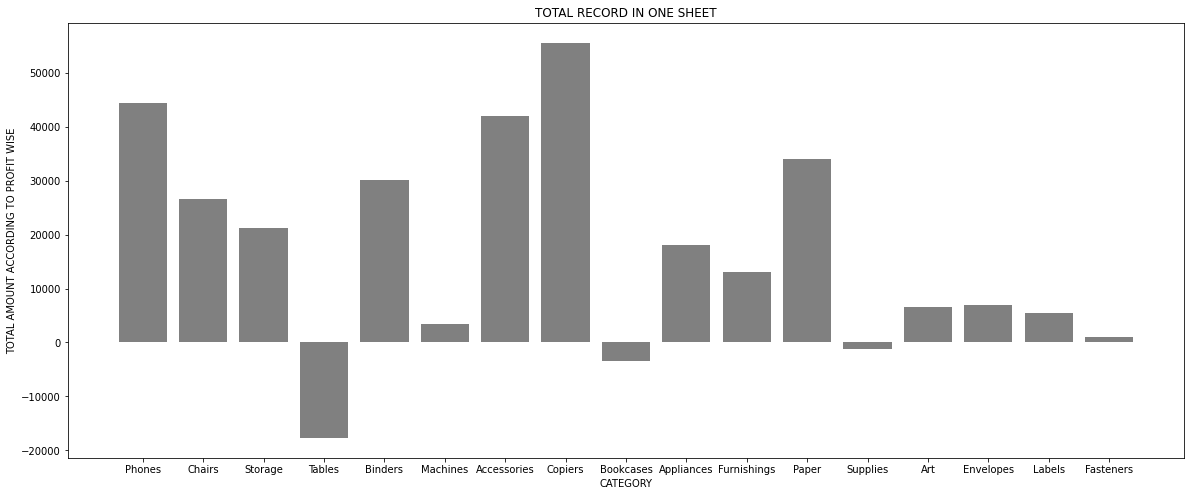

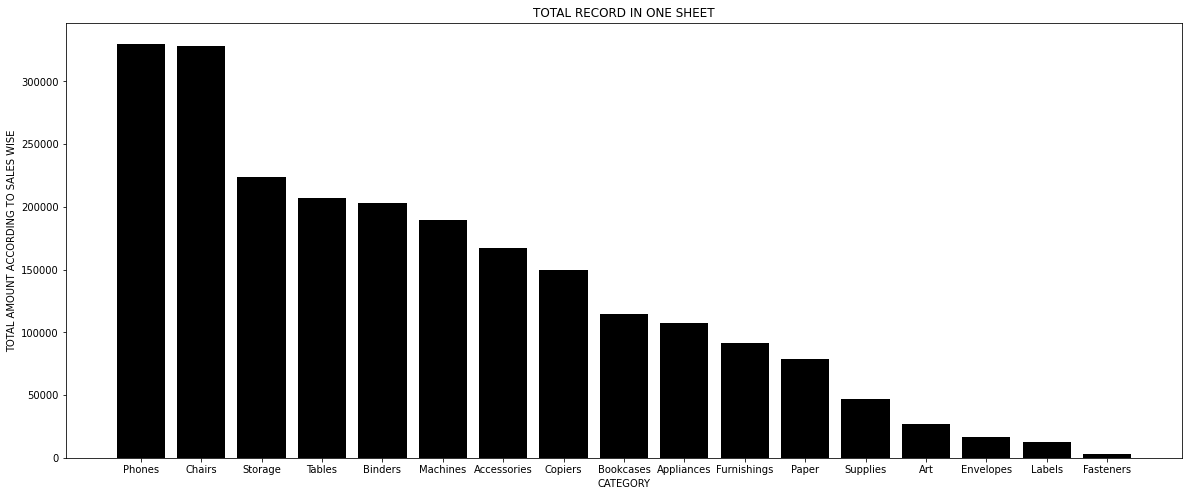

In [56]:
plt.figure(figsize=(20,8))
y=merge2['SC_TotalProfit']
x=merge2['Sub-Category']
plt.title("TOTAL RECORD IN ONE SHEET")
plt.xlabel('CATEGORY')
plt.ylabel('TOTAL AMOUNT ACCORDING TO PROFIT WISE')
plt.bar(x,y,color='gray')
plt.show()

plt.figure(figsize=(20,8))
y=merge2['SC_TotalSales']
x=merge2['Sub-Category']
plt.title("TOTAL RECORD IN ONE SHEET")
plt.xlabel('CATEGORY')
plt.ylabel('TOTAL AMOUNT ACCORDING TO SALES WISE')
plt.bar(x,y,color='black')
plt.show()


In [6]:

#plt.figure(figsize=(15,15))
#plt.pie(merge2['SC_TotalProfit'],labels=merge2['Sub-Category'],autopct='%0.2f%%',shadow=True,counterclock=True)
#plt.title("PRECENTAGE RECORD OF PROFIT THROUG PIE CHART")
#plt.show()
#print('-----------------------------------------------------------------------------------------------------------------------')
#plt.figure(figsize=(15,15))
#plt.pie(merge2['SC_TotalSales'],labels=merge2['Sub-Category'],autopct='%0.2f%%',shadow=True,counterclock=True)
#plt.title("PRECENTAGE RECORD OF SALES THROUG PIE CHART")
#plt.show()

In [44]:
GP2=df.groupby(['Quantity']).Discount.sum().sort_values(ascending = False).reset_index()
GP3=df.groupby(['Quantity']).Profit.sum().sort_values(ascending = False).reset_index()
merge3 = pd.merge(GP2, GP3, how='right',on='Quantity')
merge3.rename(columns = {'Discount':'Overall_Discount','Profit':'Overall_Profit'}, inplace = True)
merge3.head()

,Quantity,Overall_Discount,Overall_Profit
0,3,369.37,57015.5250
1,5,193.29,49516.5945
2,4,187.83,44223.3908
3,2,371.97,38448.4088
4,7,98.16,34286.9730


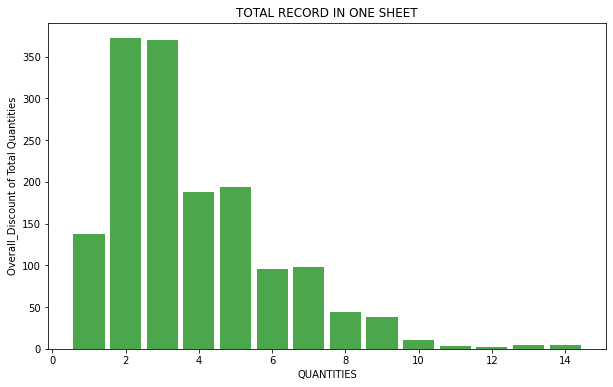

In [47]:

plt.figure(figsize=(10,6))
plt.bar(merge3['Quantity'],merge3['Overall_Discount'], width=0.85,alpha=0.7, color='green',ecolor='black')
plt.title("TOTAL RECORD IN ONE SHEET")
plt.ylabel('Overall_Discount of Total Quantities')
plt.xlabel('QUANTITIES')
plt.show()

In [48]:

GP4=df.groupby(['Category']).Discount.sum().sort_values(ascending = False).reset_index()
GP5=df.groupby(['Category']).Profit.sum().sort_values(ascending = False).reset_index()
merge4 = pd.merge(GP4, GP5, how='right',on='Category')
merge4.rename(columns = {'Discount':'Overall_Discount','Profit':'Overall_Profit'}, inplace = True)
merge4.head()

,Category,Overall_Discount,Overall_Profit
0,Technology,244.40,145454.9481
1,Office Supplies,947.80,122490.8008
2,Furniture,368.89,18451.2728


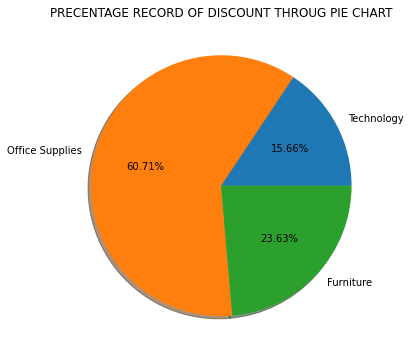

In [49]:

plt.figure(figsize=(15,6))
plt.pie(merge4['Overall_Discount'],labels=merge4['Category'],autopct='%0.2f%%',shadow=True,counterclock=True)
plt.title("PRECENTAGE RECORD OF DISCOUNT THROUG PIE CHART")
plt.show()

In [50]:
GP6=df.groupby(['Sub-Category']).Discount.sum().sort_values(ascending = False).reset_index()
GP7=df.groupby(['Sub-Category']).Profit.sum().sort_values(ascending = False).reset_index()
merge5 = pd.merge(GP6, GP7, how='right',on='Sub-Category')
merge5.rename(columns = {'Discount':'Overall_Discount','Profit':'Overall_Profit'}, inplace = True)
merge5.head()

,Sub-Category,Overall_Discount,Overall_Profit
0,Copiers,11.0,55617.8249
1,Phones,137.4,44515.7306
2,Accessories,60.8,41936.6357
3,Paper,102.6,34053.5693
4,Binders,567.0,30221.7633


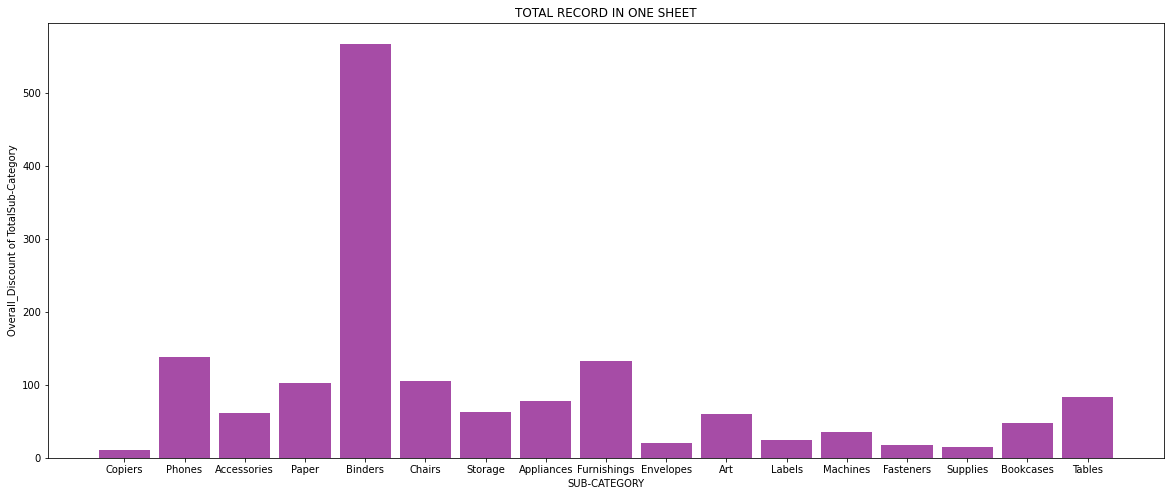

In [55]:
plt.figure(figsize=(20,8))
plt.bar(merge5['Sub-Category'],merge5['Overall_Discount'], width=0.85,alpha=0.7, color='purple',ecolor='black')
plt.title("TOTAL RECORD IN ONE SHEET")
plt.ylabel('Overall_Discount of TotalSub-Category')
plt.xlabel('SUB-CATEGORY')
plt.show()

  ## Thanks!